In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [73]:
data = np.loadtxt('HoverH0.dat', skiprows=1, unpack=True)

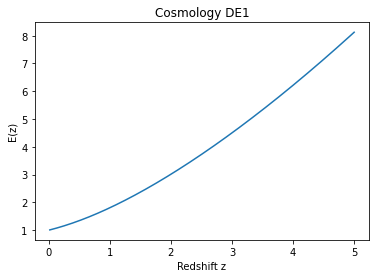

In [74]:
plt.figure()
plt.title('Cosmology DE1')
plt.xlabel('Redshift z')
plt.ylabel('E(z)')
plt.plot(data[0], data[2])
plt.show()

# Distances

# Comoving distance
Trapezoidal rule is used for the integration
$$\int_{0}^{z}\frac{cdz}{H(z)} = \frac{c}{H_{0}} \int_{0}^{z}\frac{dz}{E(z)}$$

In [75]:
integral = [None] * len(data)
integral[0] = data[0]
for i in range(1, len(data)):
	integral[i] = integrate.cumtrapz(1.0 / data[i], data[0], initial=0) * 3 # Times value of Hubble distance

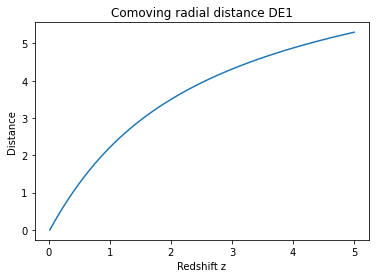

In [76]:
comoving = integral
plt.figure()
plt.title('Comoving radial distance DE1')
plt.xlabel('Redshift z')
plt.ylabel('Distance')
plt.plot(comoving[0], comoving[2])
plt.show()

## Luminosity distance

In [77]:
luminosity = [None] * len(data)
luminosity[0] = data[0]
for i in range(1, len(data)):
	luminosity[i] = (1 + luminosity[0]) * integral[i]

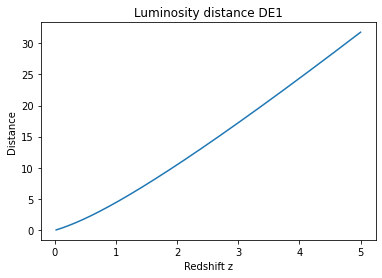

In [78]:
plt.figure()
plt.title('Luminosity distance DE1')
plt.xlabel('Redshift z')
plt.ylabel('Distance')
plt.plot(luminosity[0], luminosity[2])
plt.show()

## Angular distance

In [79]:
angular = [None] * len(data)
angular[0] = data[0]
for i in range(1, len(data)):
	angular[i] = integral[i] / (1 + angular[0])

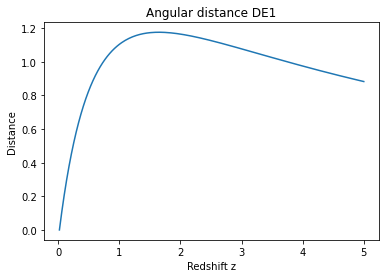

In [80]:
plt.figure()
plt.title('Angular distance DE1')
plt.xlabel('Redshift z')
plt.ylabel('Distance')
plt.plot(angular[0], angular[2])
plt.show()

## Diameter distance

In [81]:
k = [0, -1, 0, 1, 1, 1, 1, 1]
diameter = [None] * len(data)
diameter[0] = data[0]
for i in range(1, len(data)):
	if k[i - 1] == 1:
		diameter[i] = np.sin(comoving[i])
	elif k[i - 1] == 0:
		diameter[i] = comoving[i]
	elif k[i - 1] == -1:
		diameter[i] = np.sinh(comoving[i])

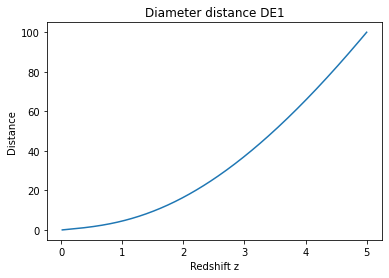

In [82]:
plt.figure()
plt.title('Diameter distance DE1')
plt.xlabel('Redshift z')
plt.ylabel('Distance')
plt.plot(diameter[0], diameter[2])
plt.show()

Putting them all together

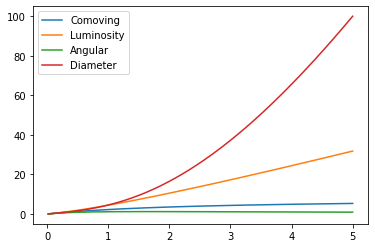

In [83]:
plt.figure()
plt.plot(comoving[0], comoving[2], label='Comoving')
plt.plot(luminosity[0], luminosity[2], label='Luminosity')
plt.plot(angular[0], angular[2], label='Angular')
plt.plot(diameter[0], diameter[2], label='Diameter')
plt.legend()
plt.show()

# Volume

In [84]:
omega = 24 * np.pi / 180
volume = [None] * len(data)
volume[0] = data[0]
for i in range(1, len(data)):
	volume[i] = integrate.cumtrapz(diameter[i]**2 / data[i], data[0], initial=0) * omega**2 * 3**3

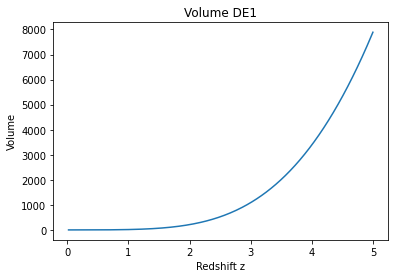

In [85]:
plt.figure()
plt.title('Volume DE1')
plt.xlabel('Redshift z')
plt.ylabel('Volume')
plt.plot(volume[0], volume[2])
plt.show()

# Flux

In [86]:
L = 50
flux = [None] * len(data)
flux[0] = data[0]
for i in range(1, len(data)):
	flux[i] = L / (4 * np.pi * luminosity[i])

C:\Users\Carlos\AppData\Local\Temp/ipykernel_40908/2209743808.py:5: RuntimeWarning: divide by zero encountered in true_divide
  flux[i] = L / (4 * np.pi * luminosity[i])


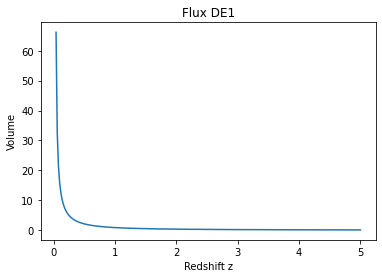

In [87]:
plt.figure()
plt.title('Flux DE1')
plt.xlabel('Redshift z')
plt.ylabel('Volume')
plt.plot(flux[0], flux[2])
plt.show()